#  Introdução

Com o aumento da concorrência e das opções disponíveis no mercado, entender o comportamento dos consumidores se tornou essencial para que as empresas possam se destacar e manter um relacionamento duradouro com seus clientes. A análise de dados tem papel fundamental nesse processo, pois permite transformar grandes volumes de informações em insights que ajudam a compreender melhor quem são os consumidores, o que compram, quando e por quê.

Dentro desse contexto, a **segmentação de clientes** surge como uma estratégia importante para identificar grupos de consumidores com características e comportamentos semelhantes. A partir dessa identificação, é possível direcionar ações de marketing mais eficazes, personalizar ofertas e melhorar a experiência do cliente.

Neste projeto, será realizada uma análise exploratória do conjunto de dados **Consumer Behavior and Shopping Habits Dataset**, disponível no [Kaggle](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset). Esses dados reúnem informações detalhadas sobre o perfil e os hábitos de compra de diferentes consumidores, incluindo aspectos demográficos, histórico de compras, preferências por produtos, uso de descontos, tipo de entrega, entre outros fatores.

A ideia central é compreender como essas variáveis se relacionam e identificar padrões de comportamento que possam ser utilizados para dividir os consumidores em grupos (ou segmentos) com características semelhantes. Essa etapa inicial de exploração dos dados será fundamental para embasar futuras análises mais aprofundadas, como modelos de **clusterização** e **predição de comportamento de compra**. Basicamente, o objetivo principal é extrair perfis de clientes via clusterização, que possam ser utilizados para orientar estratégias de marketing e vendas mais direcionadas e eficazes.


#  Descrição do Conjunto de Dados

O conjunto de dados reúne informações sobre o perfil e os hábitos de compra de diferentes consumidores, tanto em lojas físicas quanto em canais online. Ele foi construído com o objetivo de oferecer uma visão ampla sobre o comportamento do cliente, permitindo análises relacionadas à **segmentação**, **fidelização** e **preferências de consumo**.

A seguir, está a descrição detalhada de cada variável presente no dataset:

| Variável                  | Descrição                                                       |
| ------------------------- | --------------------------------------------------------------- |
| **Customer ID**           | Identificador único de cada cliente.                            |
| **Age**                   | Idade do cliente.                                               |
| **Gender**                | Gênero do cliente.                                              |
| **Item Purchased**        | Nome do produto adquirido.                                      |
| **Category**              | Categoria do produto (exemplo: roupas, eletrônicos, alimentos). |
| **Purchase Amount (USD)** | Valor gasto na compra, em dólares.                              |
| **Location**              | Local onde a compra foi realizada.                              |
| **Size**                  | Tamanho do produto, quando aplicável.                           |
| **Color**                 | Cor do produto adquirido.                                       |
| **Season**                | Estação do ano associada à compra.                              |
| **Review Rating**         | Avaliação dada pelo cliente ao produto.                         |
| **Subscription Status**    | Indica se o cliente possui uma assinatura ativa.                |
| **Shipping Type**          | Tipo de entrega utilizado (ex.: padrão, expresso).              |
| **Discount Applied**       | Indica se foi aplicado algum desconto na compra.                |
| **Promo Code Used**        | Informa se foi utilizado um código promocional.                 |
| **Previous Purchases**     | Número de compras anteriores do cliente.                        |
| **Payment Method**         | Método de pagamento utilizado (ex.: cartão, dinheiro).          |
| **Frequency of Purchases** | Frequência com que o cliente realiza compras.                   |




<a id="cd"></a>

# 1) Carregamento dos dados

In [31]:
import numpy as np
import pandas as pd
import kagglehub
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from plotnine import ggplot, aes, geom_bar, geom_text, labs, theme_minimal, theme, coord_flip, scale_fill_brewer, geom_histogram, geom_boxplot, facet_wrap


path = kagglehub.dataset_download("zeesolver/consumer-behavior-and-shopping-habits-dataset")

df = pd.read_csv(f'{path}/shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


<a id="eda"></a>

## 2) Análise Exploratória

Nessa etapa inicial, o objetivo é explorar o conjunto de dados para entender sua estrutura, identificar padrões e detectar possíveis problemas que possam afetar análises futuras.

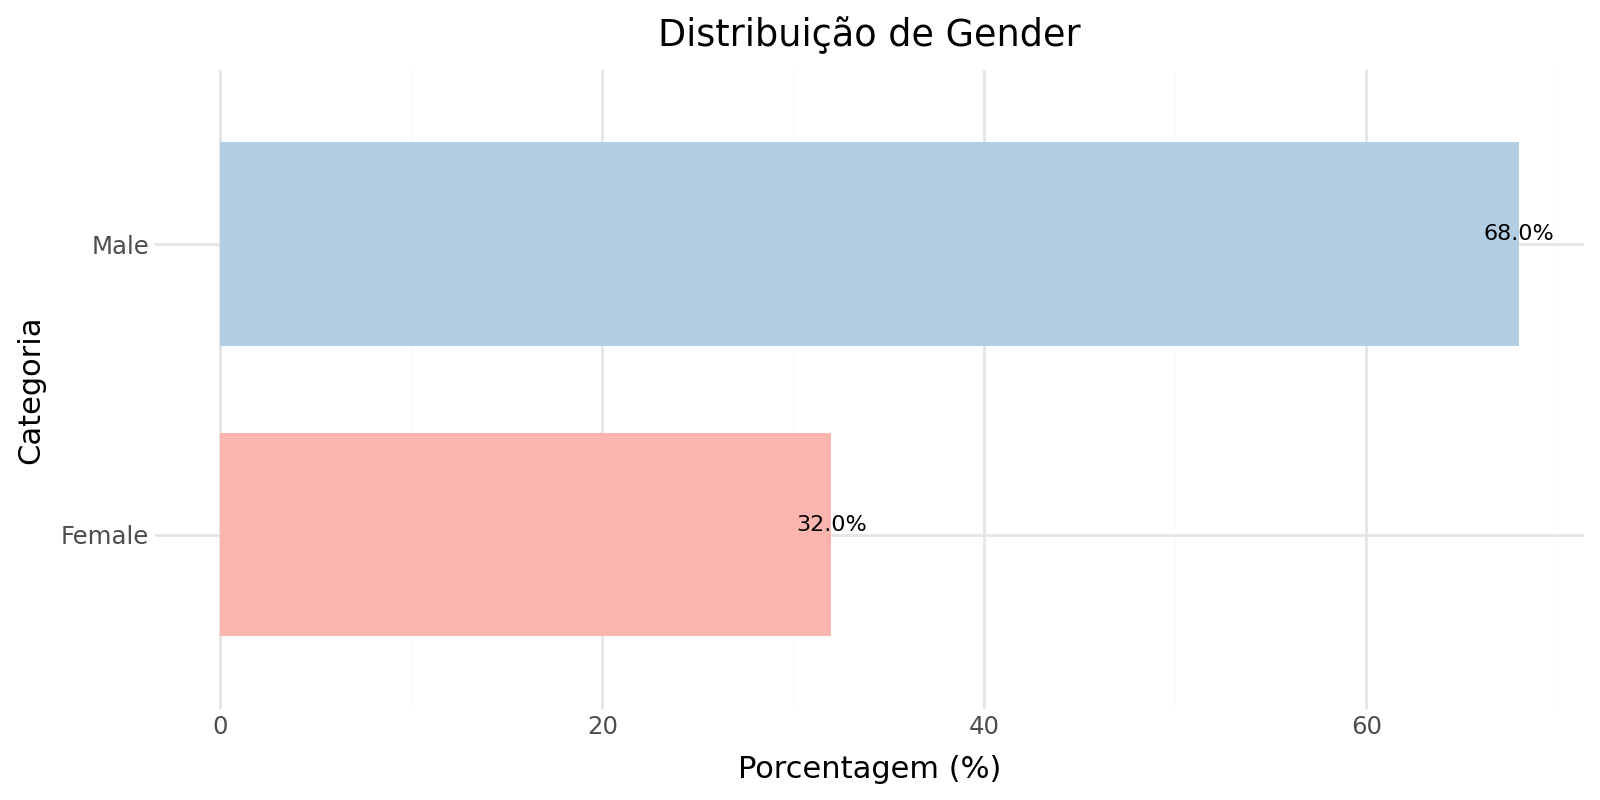

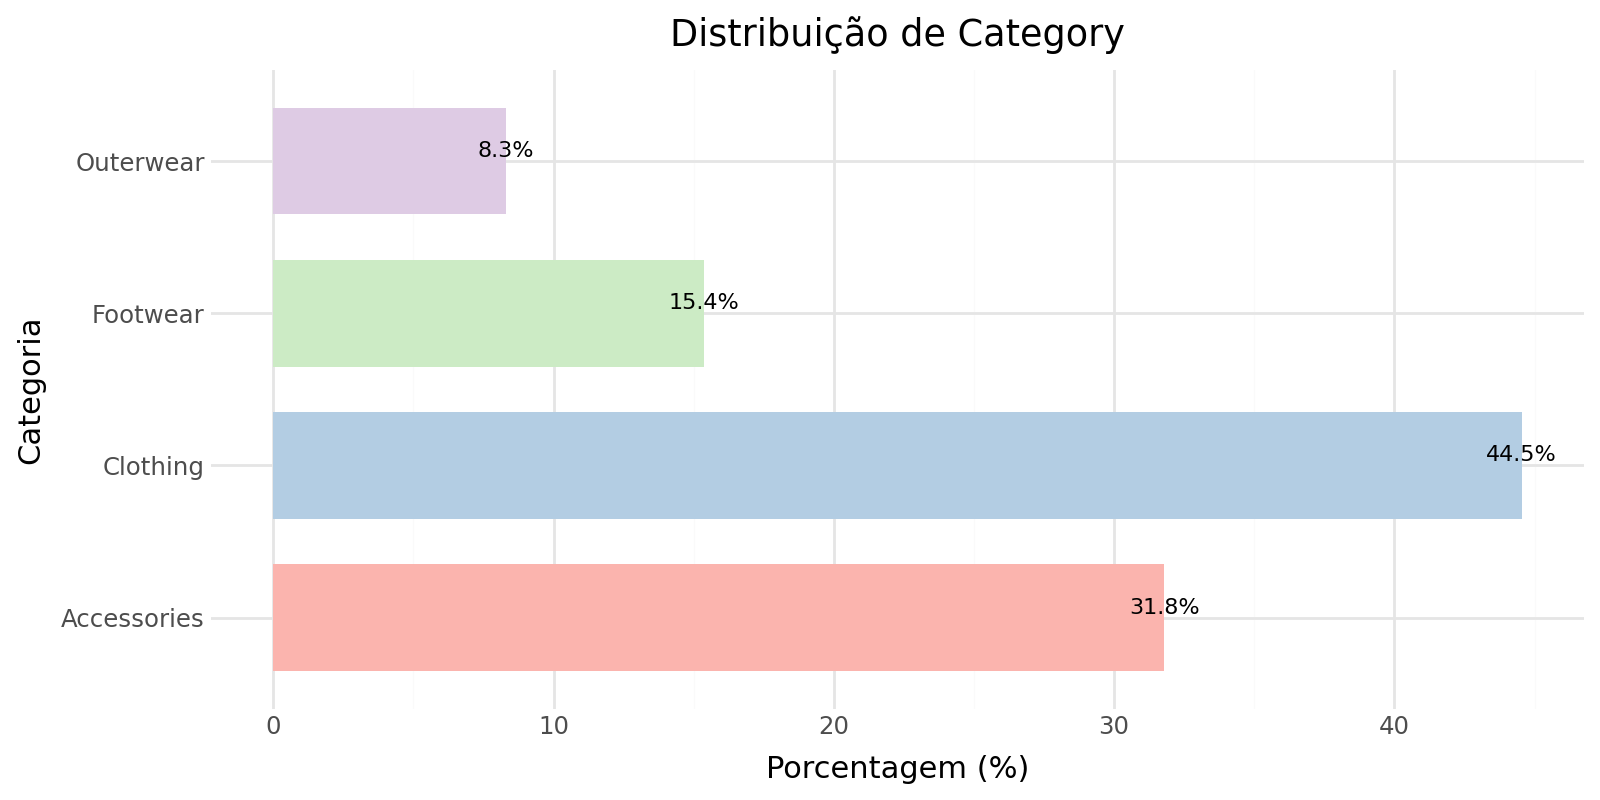

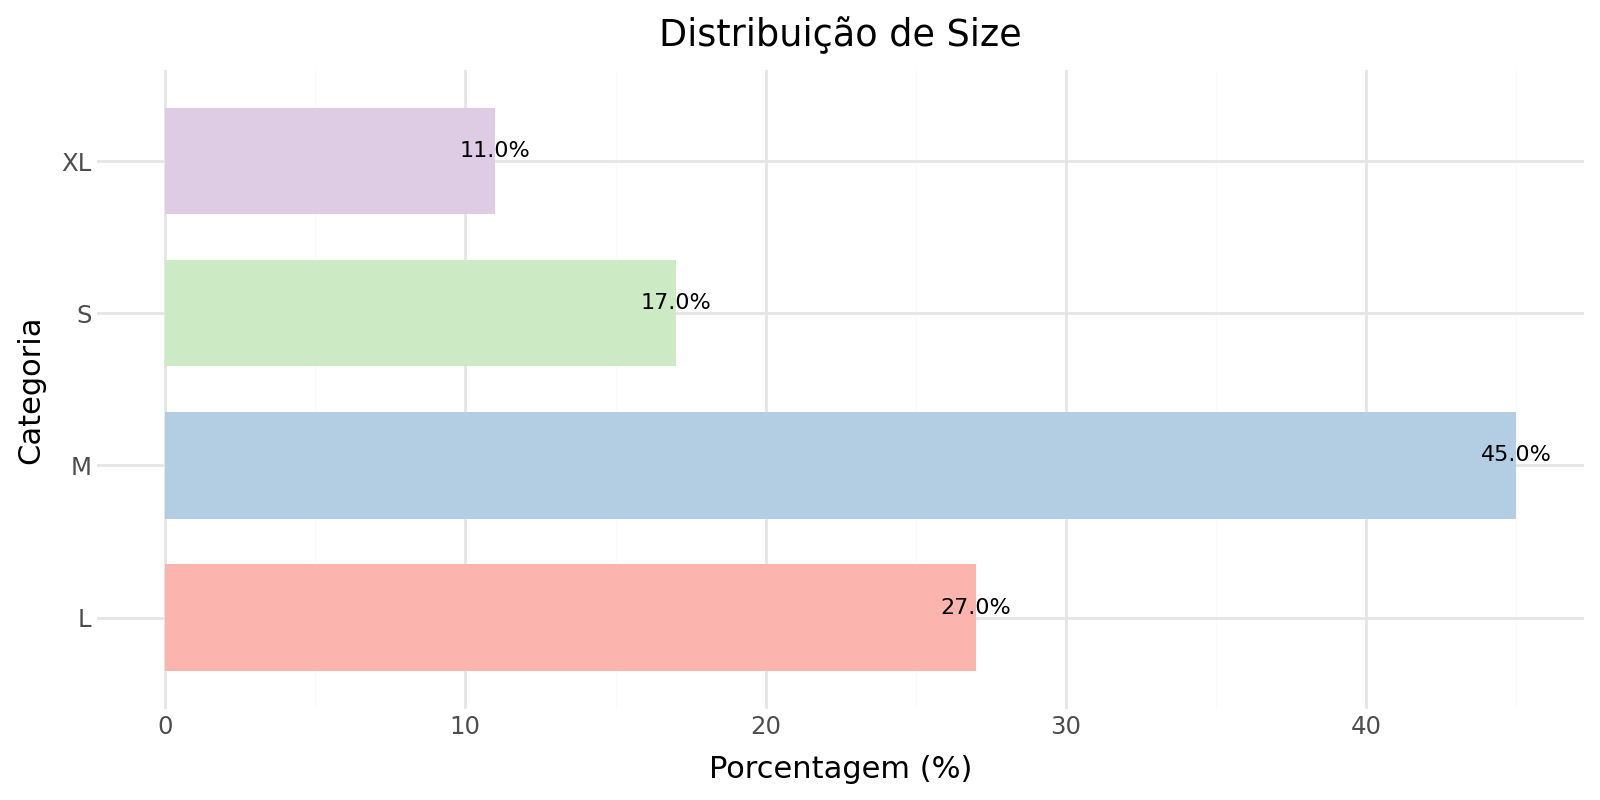

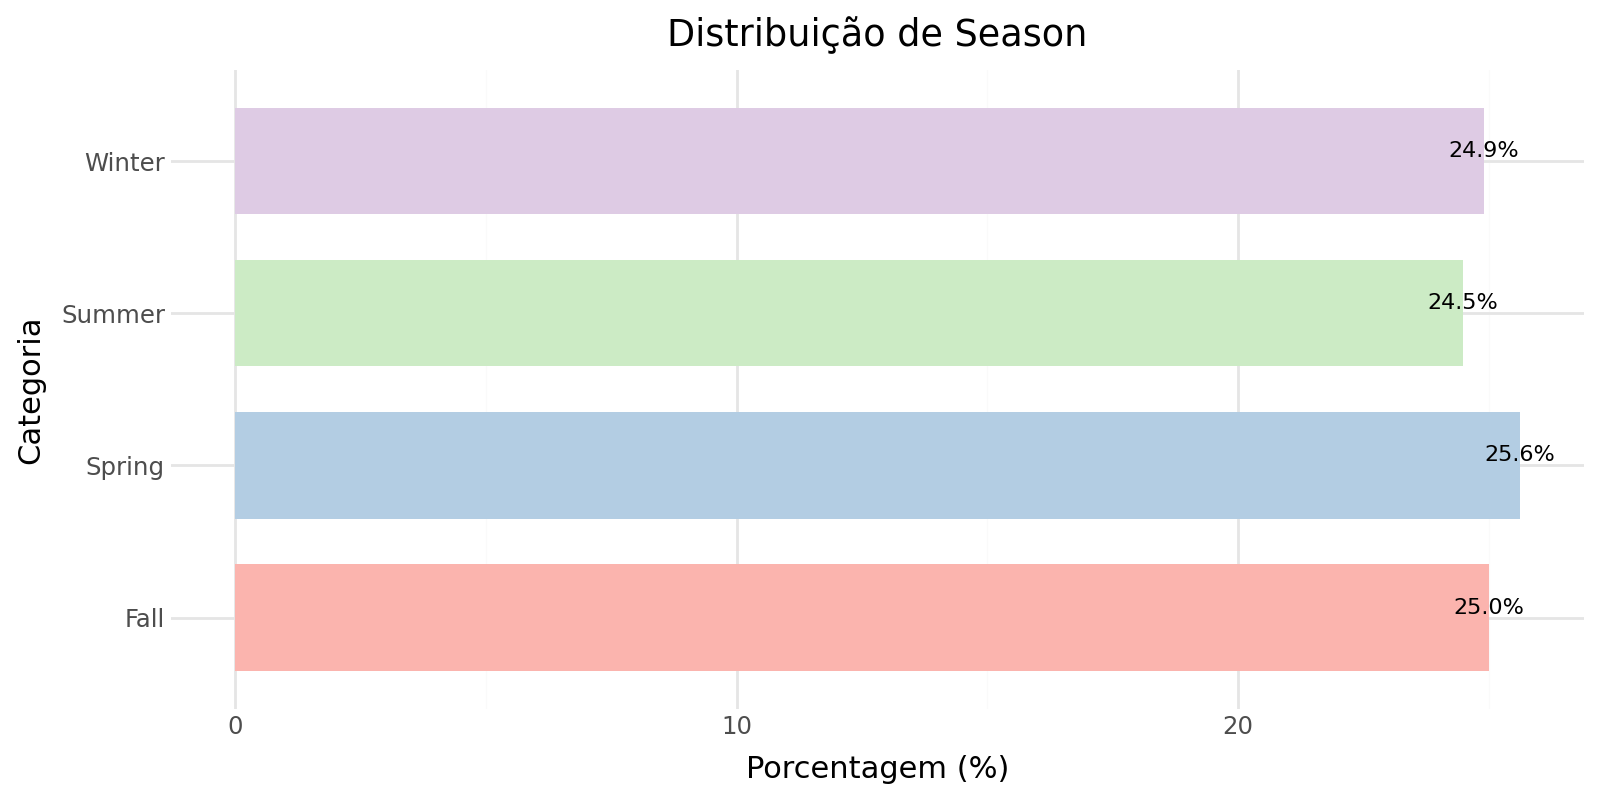

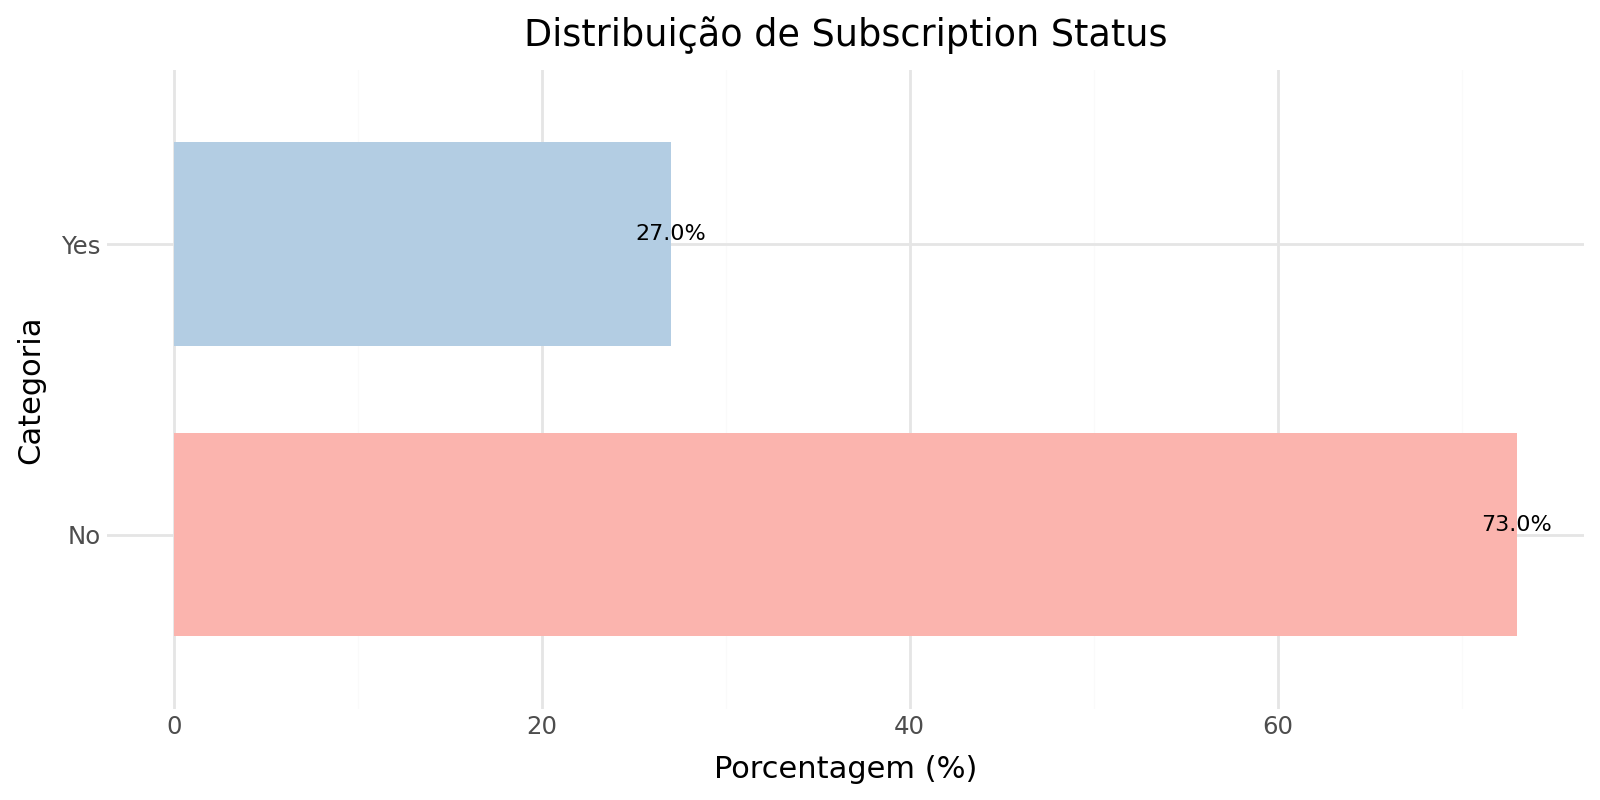

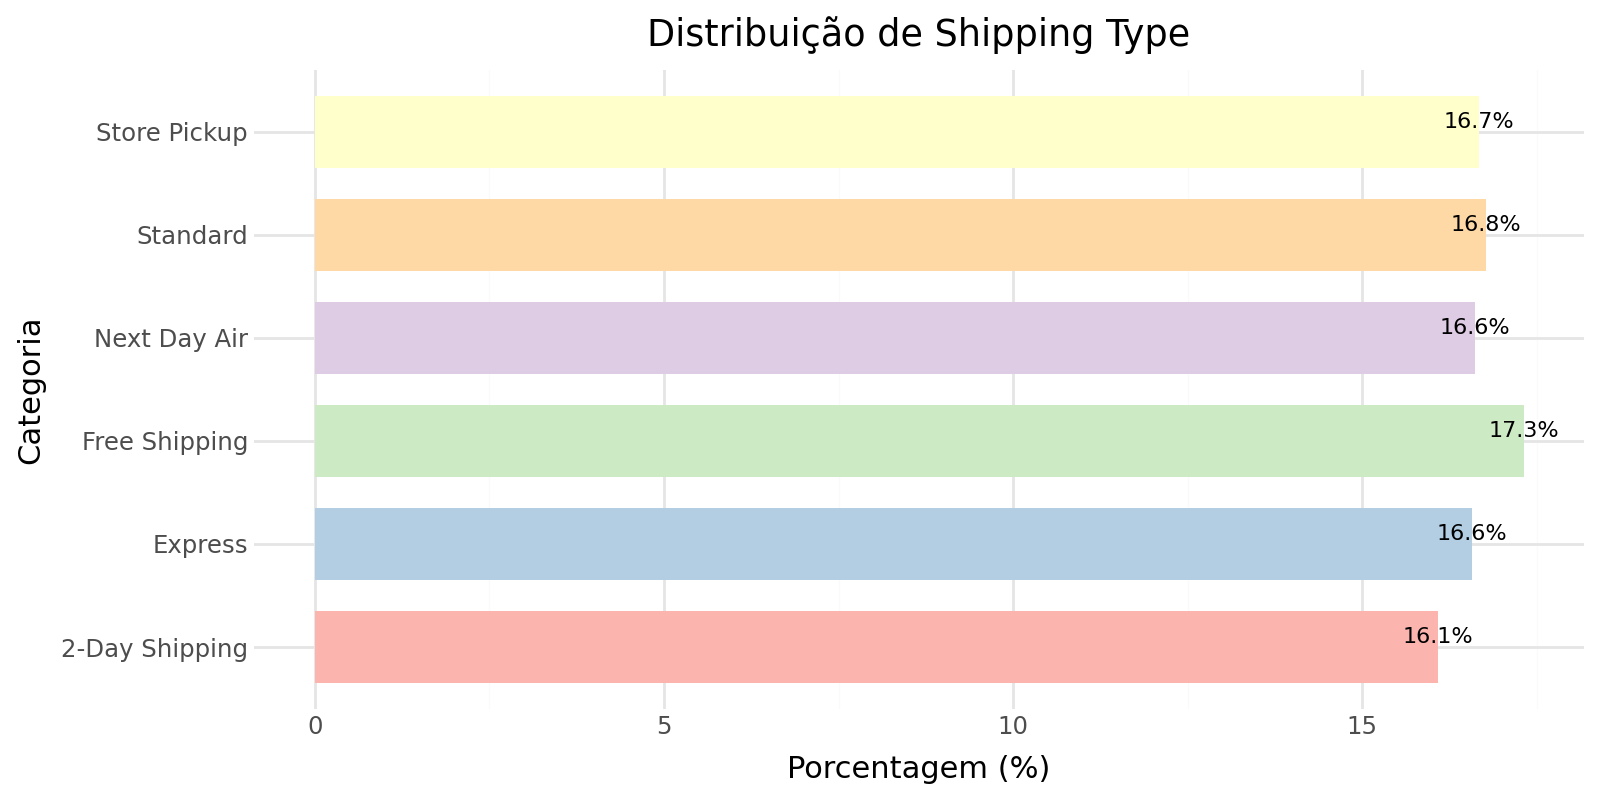

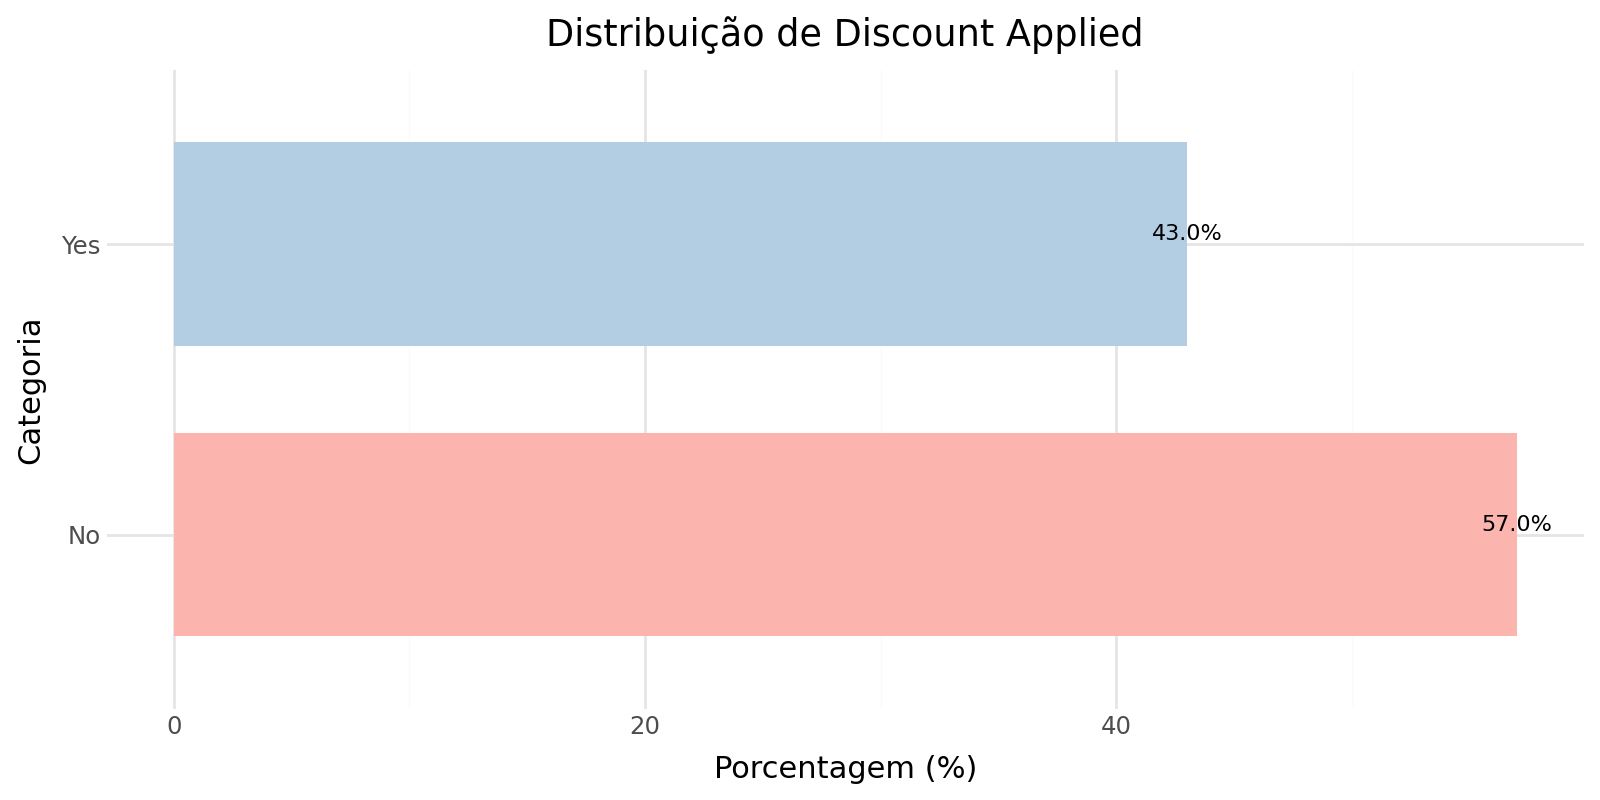

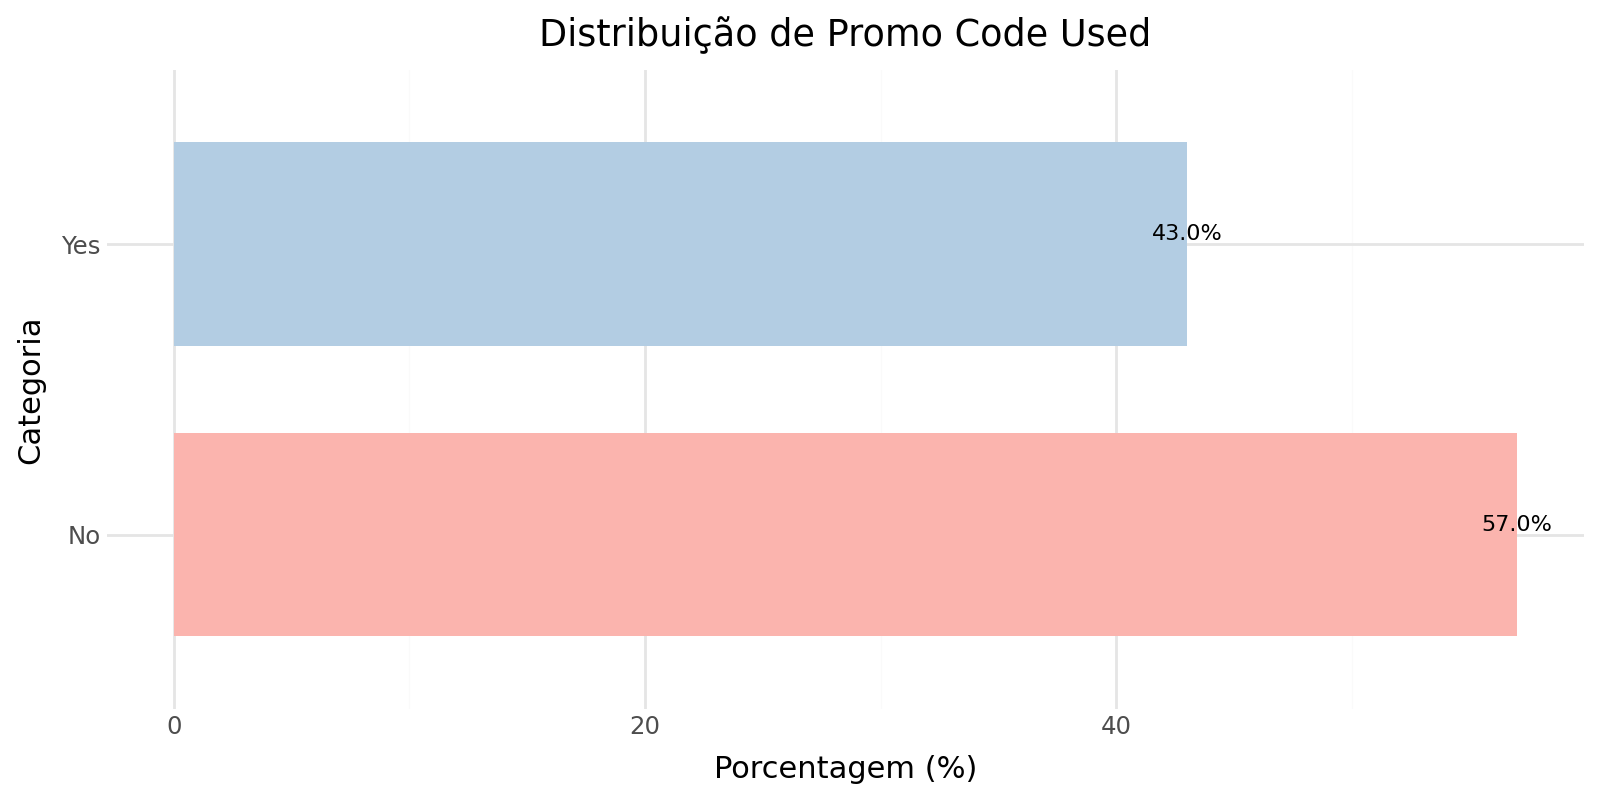

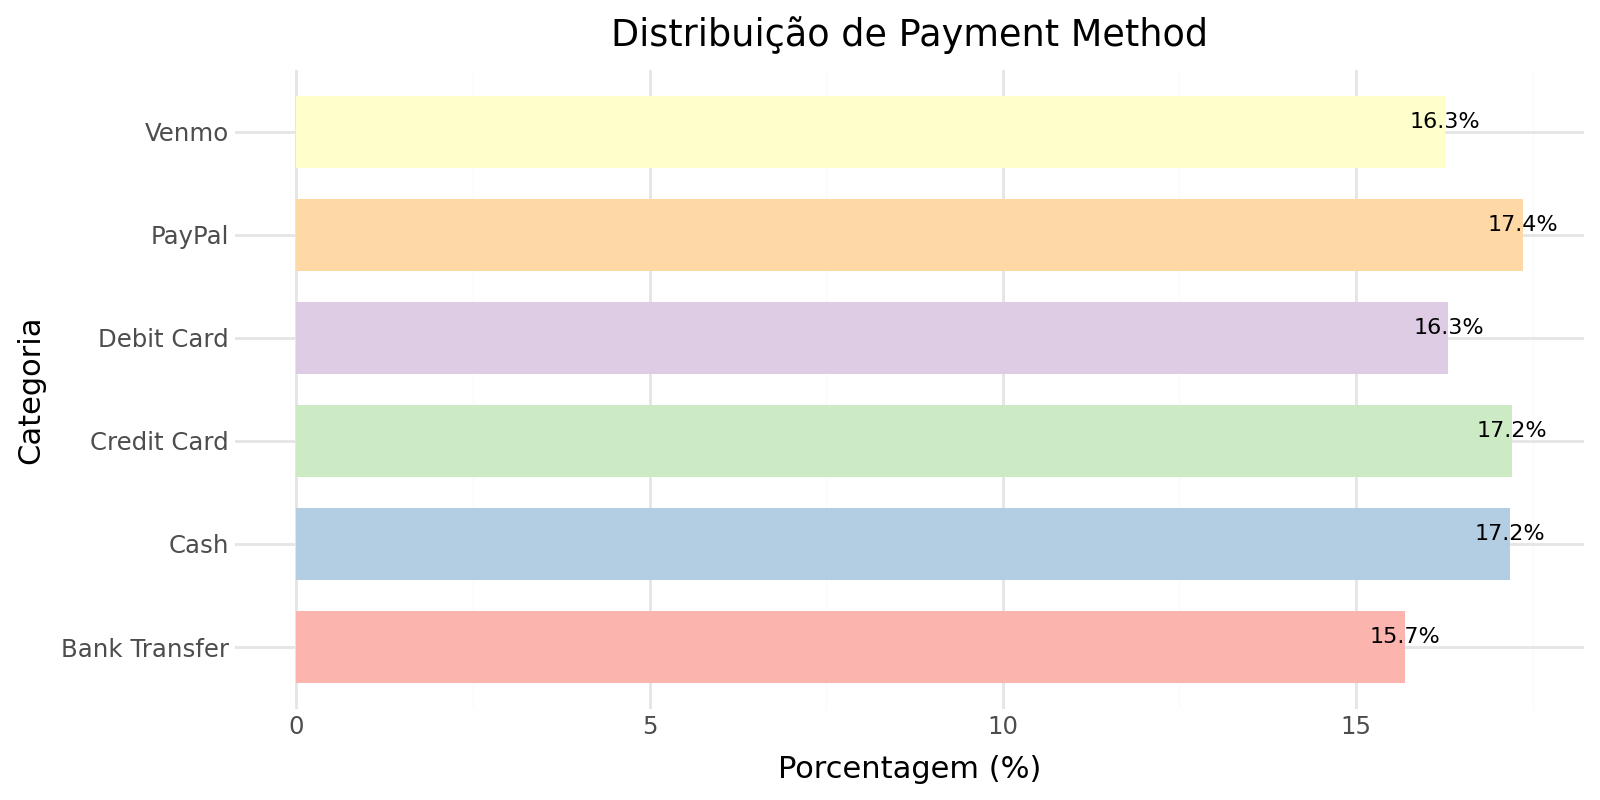

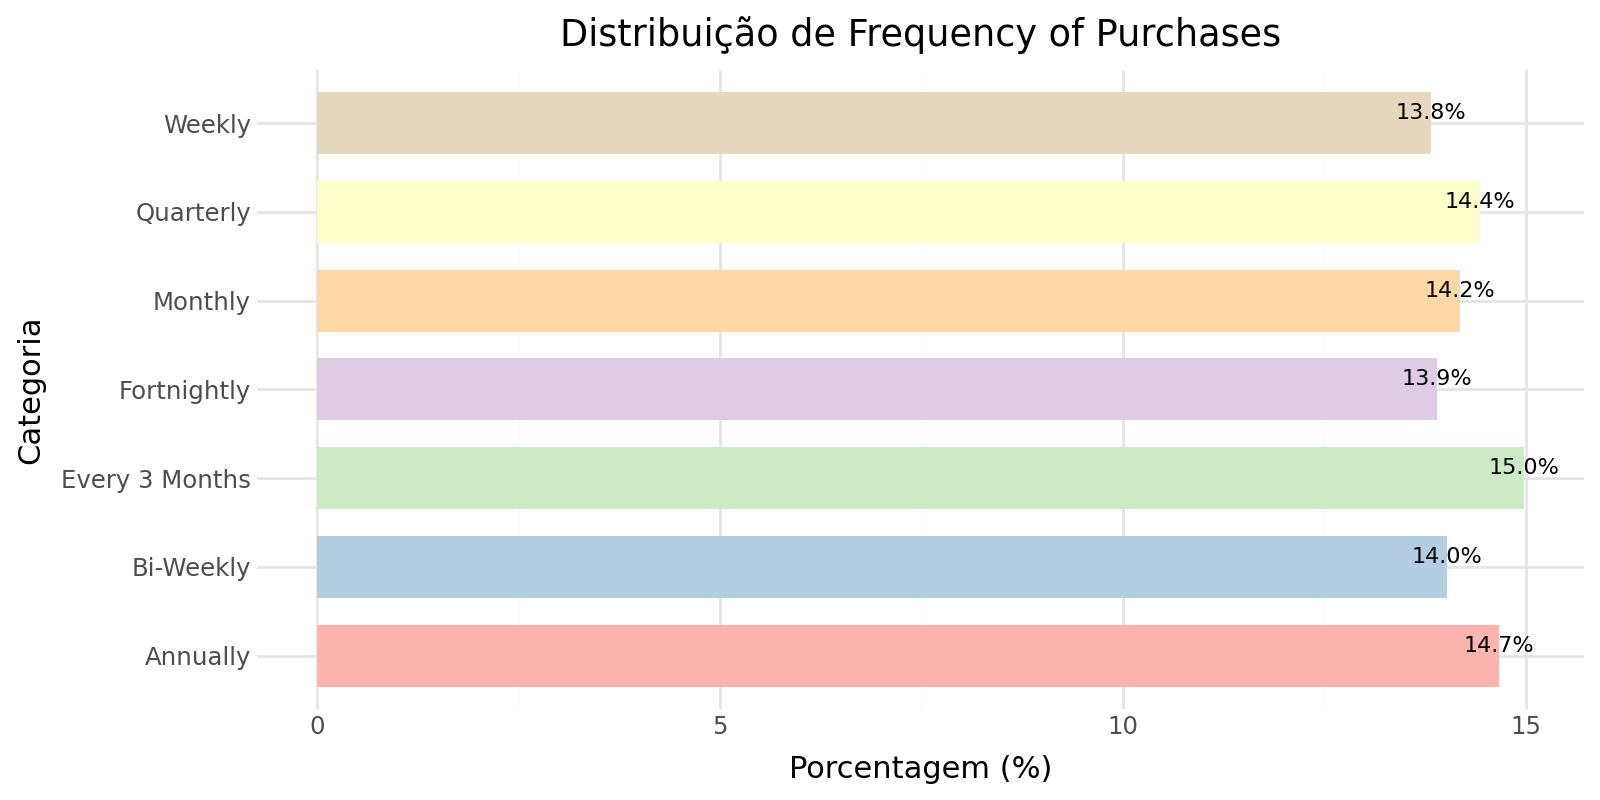

In [32]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols = [col for col in categorical_cols if col.lower() not in ['customer id', 'id', 'customerid']]

cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= 10]

from plotnine import options
options.figure_size = (8, 4)

for col in cols_to_plot:
    counts = df[col].value_counts(normalize=True).reset_index()
    counts.columns = [col, 'prop']
    counts['prop_percent'] = counts['prop'] * 100
    counts['label'] = counts['prop_percent'].map(lambda x: f'{x:.1f}%')

    p = (
        ggplot(counts, aes(x=col, y='prop_percent', fill=col))
        + geom_bar(stat='identity', show_legend=False, width=0.7)
        + geom_text(aes(label='label'), va='bottom', size=8)
        + coord_flip()
        + scale_fill_brewer(type='qual', palette='Pastel1')
        + theme_minimal()
        + theme(
            figure_size=(8, 4),
        )
        + labs(
            title=f"Distribuição de {col}",
            x="Categoria",
            y="Porcentagem (%)"
        )
    )

    display(p)


As variáveis analisadas são categóricas, ou seja, representam informações qualitativas sobre os clientes e as compras realizadas.  
Cada gráfico mostra a **distribuição percentual** de categorias dentro de cada variável, permitindo compreender o comportamento e as preferências dos consumidores.

---

#### **Gender (Gênero)**
O gráfico mostra que **68% dos clientes são homens** e **32% são mulheres**.  
Essa diferença sugere que o público da base de dados é predominantemente masculino, o que pode direcionar ações de marketing e comunicação voltadas a esse grupo, ou incentivar campanhas para atrair mais clientes do gênero feminino.

---

#### **Category (Categoria de Produto)**
A categoria **Clothing (Roupas)** representa **44,5%** das compras, seguida por **Accessories (Acessórios)** com **31,8%**, **Footwear (Calçados)** com **15,4%**, e **Outerwear (Casacos)** com **8,3%**.  
Isso indica que os produtos de vestuário e acessórios são os mais populares, representando juntos mais de 75% das compras — um indício claro de que a base de clientes tem forte foco em moda e estilo.

---

#### **Size (Tamanho do Produto)**
O tamanho **M** é o mais vendido (**45%**), seguido de **L (27%)**, **S (17%)** e **XL (11%)**.  
Esses resultados mostram uma **maior demanda por tamanhos médios e grandes**, algo importante para o planejamento de estoque e estratégias de precificação.

---

#### **Season (Estação do Ano)**
As vendas estão **bem distribuídas entre as quatro estações**, variando de **24,5% a 25,6%**, com leve destaque para a primavera (**25,6%**).  
Isso sugere que não há forte sazonalidade nas compras — o que indica um fluxo de vendas relativamente constante ao longo do ano.

---

#### **Subscription Status (Assinatura Ativa)**
A maioria dos clientes (**73%**) **não possui assinatura ativa**, enquanto **27%** têm.  
Esse dado mostra **oportunidade para crescimento de assinaturas**, com potencial para estratégias de fidelização e programas de benefícios.

---

#### **Shipping Type (Tipo de Entrega)**
Os métodos de entrega estão bem equilibrados: *Free Shipping* (**17,3%**), *Standard* (**16,8%**), *Express* (**16,6%**), *Next Day Air* (**16,6%**), *Store Pickup* (**16,7%**) e *2-Day Shipping* (**16,1%**).  
Essa distribuição equilibrada mostra que os clientes utilizam **diversas modalidades de envio**, sem uma preferência marcante — o que pode indicar eficiência logística em diferentes opções.

---

#### **Discount Applied e Promo Code Used**
Em ambos os casos, **57% das compras não utilizaram desconto ou cupom**, enquanto **43%** fizeram uso dessas promoções.  
Isso indica que uma parcela considerável dos clientes é **sensível a promoções e incentivos de preço**, mas que a maioria ainda compra sem depender de descontos, o que sugere **boa percepção de valor dos produtos**.

---

#### **Payment Method (Método de Pagamento)**
Os métodos de pagamento estão **bem distribuídos**, com destaque para *PayPal (17,4%)*, *Credit Card (17,2%)* e *Cash (17,2%)*.  
Os demais — *Debit Card (16,3%)*, *Venmo (16,3%)* e *Bank Transfer (15,7%)* — também têm representatividade similar.  

---

#### **Frequency of Purchases (Frequência de Compras)**
As frequências de compra estão distribuídas de forma equilibrada, com valores entre **13,8% e 15,0%** para categorias como *Weekly*, *Monthly*, *Quarterly* e *Annually*.  
Isso mostra que há **clientes de diferentes perfis de compra**, desde os mais recorrentes até os ocasionais.  
A ausência de concentração forte em uma categoria indica **base de clientes variada e heterogênea**.

---

### **Síntese Geral**
A análise das variáveis categóricas revela que:
- O público é majoritariamente masculino (68%).  
- O foco principal está em produtos de vestuário e acessórios.  
- Há demanda predominante por tamanhos médios e grandes.  
- As vendas são constantes ao longo do ano, sem grande variação sazonal.  
- Existe potencial de crescimento no programa de assinaturas.  
- E há equilíbrio tanto nos métodos de pagamento quanto nas modalidades de envio.

Essas informações são essenciais para entender o comportamento do consumidor e embasar estratégias de marketing, estoque e fidelização.


In [33]:
# Distribuição das variáveis (hist, boxplot, describe())
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols].describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Analisando variável: Age



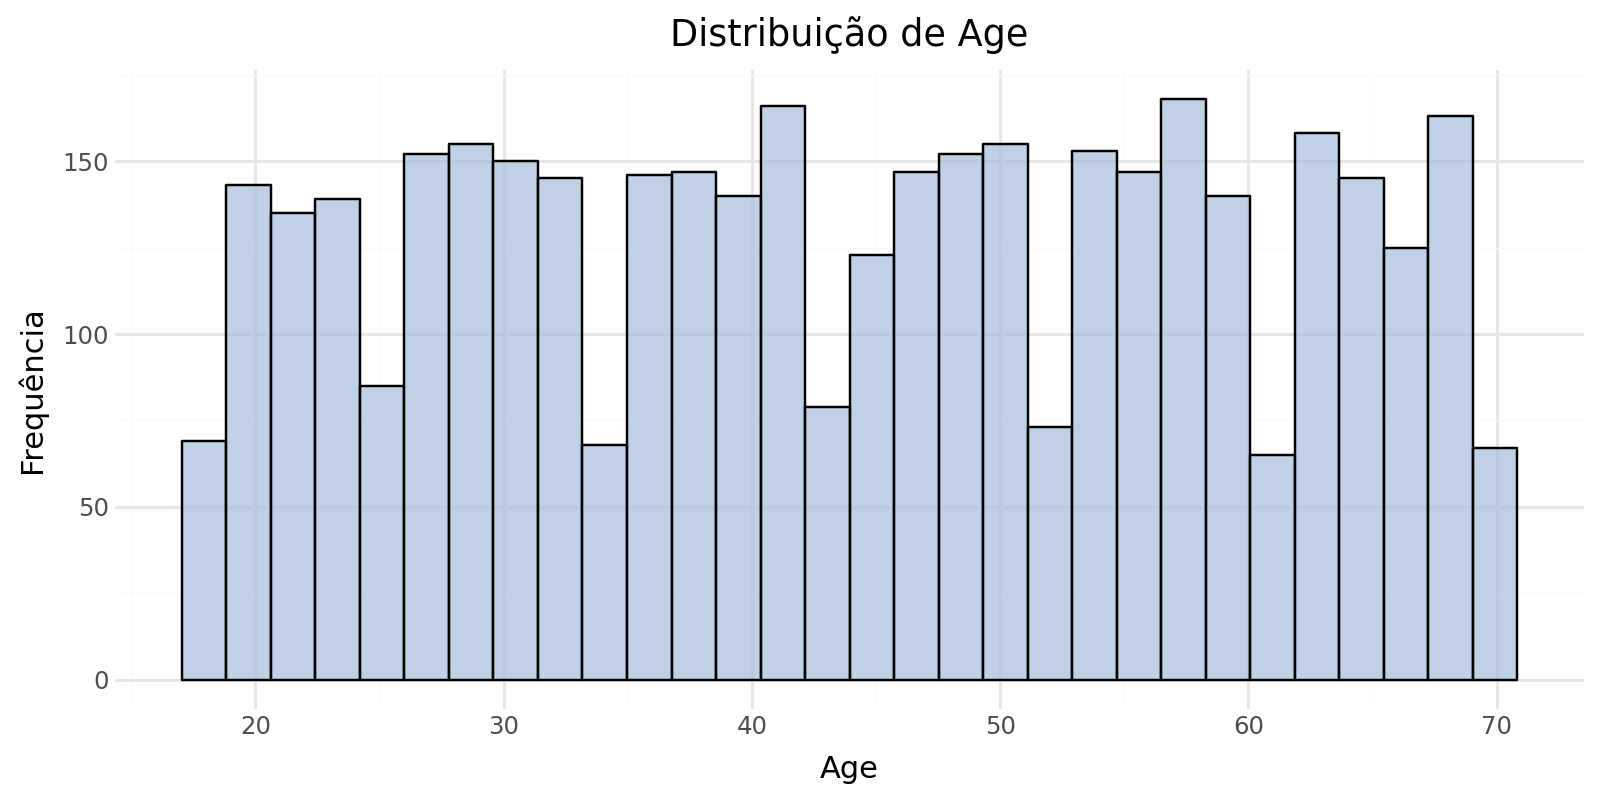

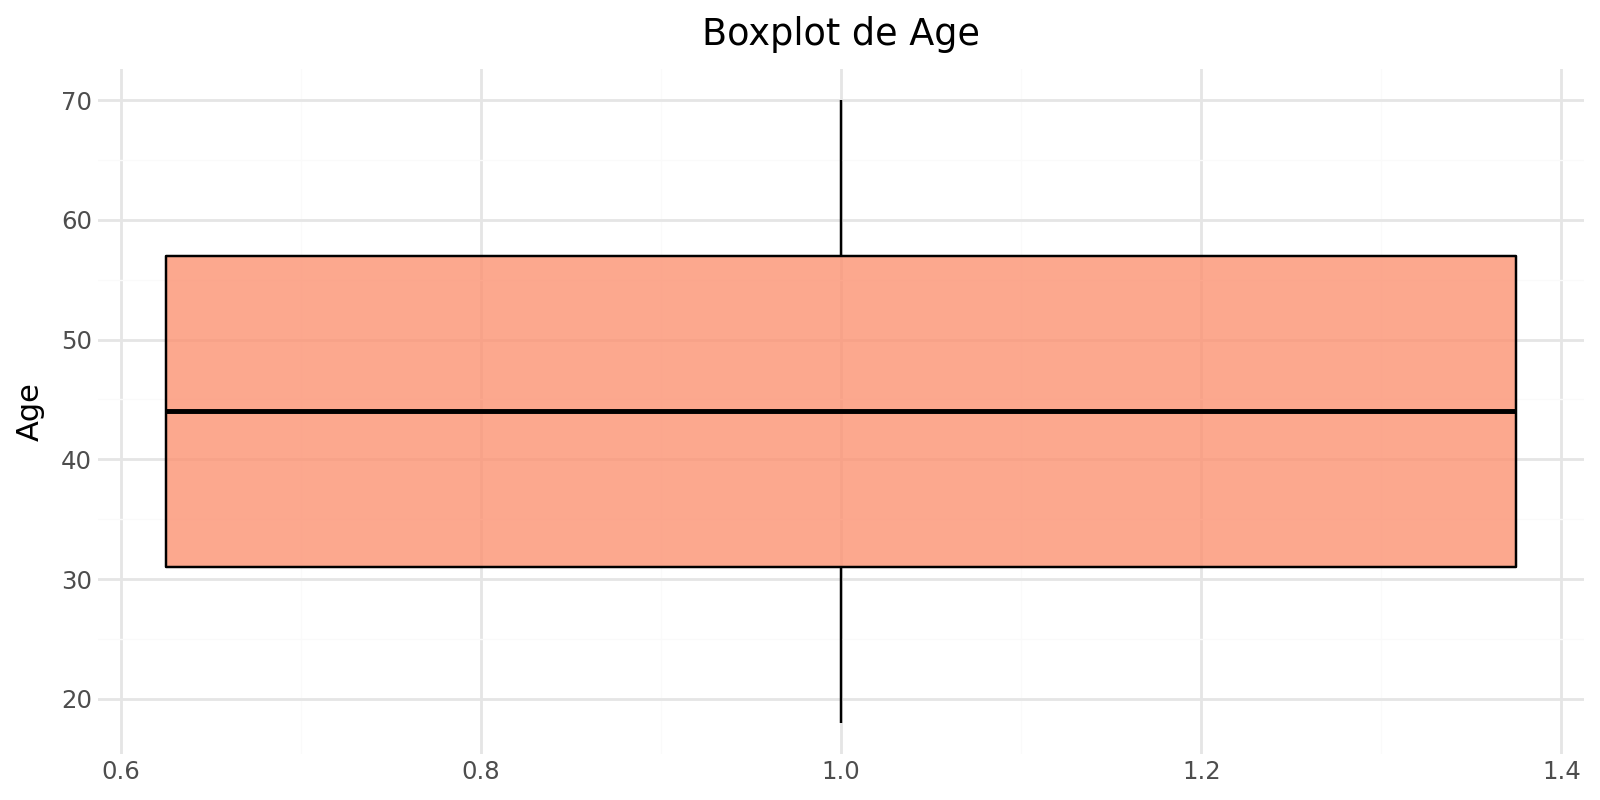

Analisando variável: Purchase Amount (USD)



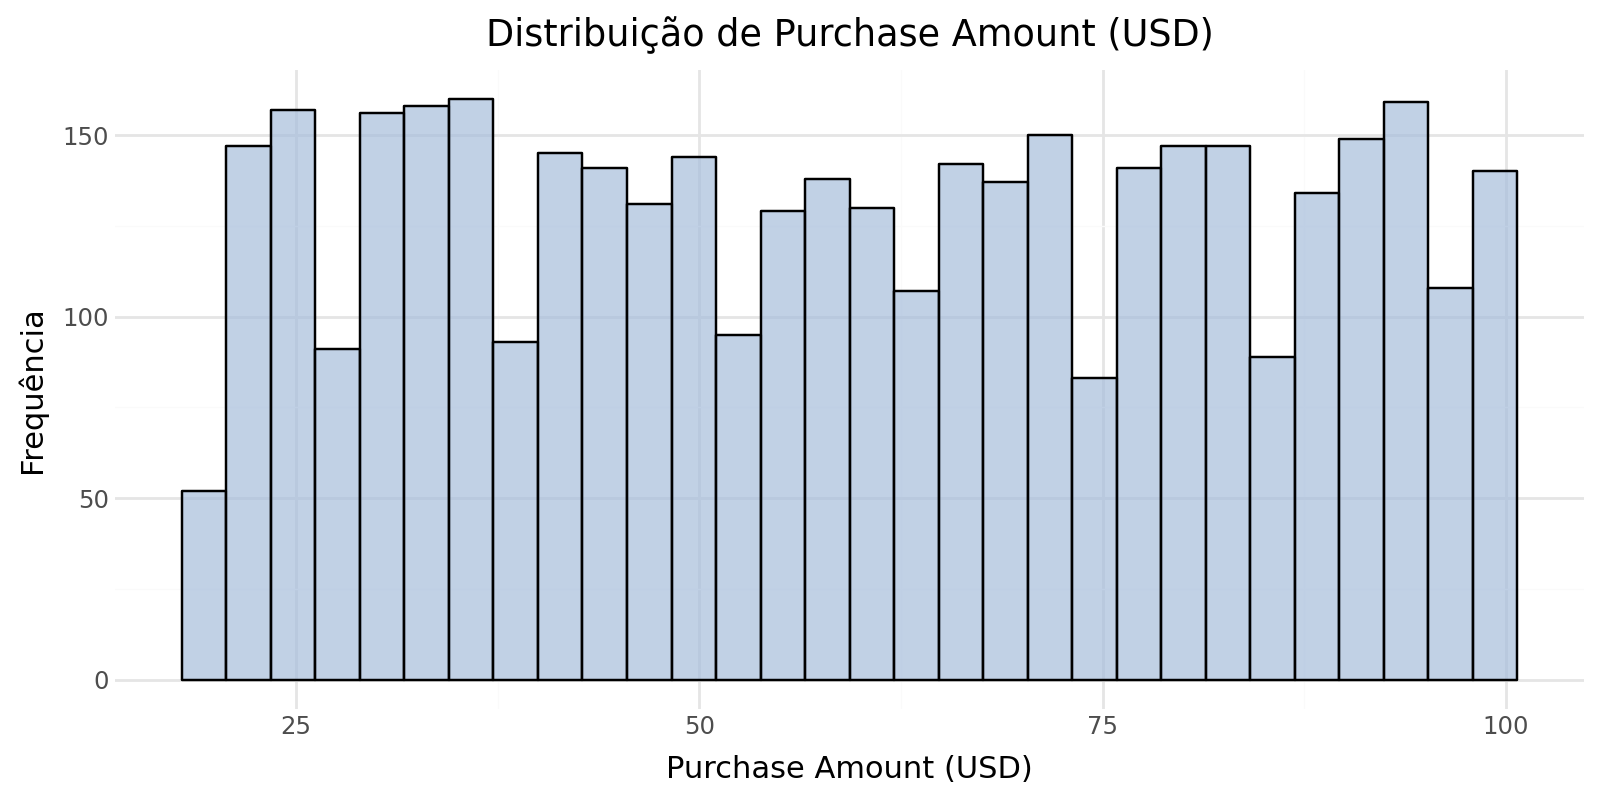

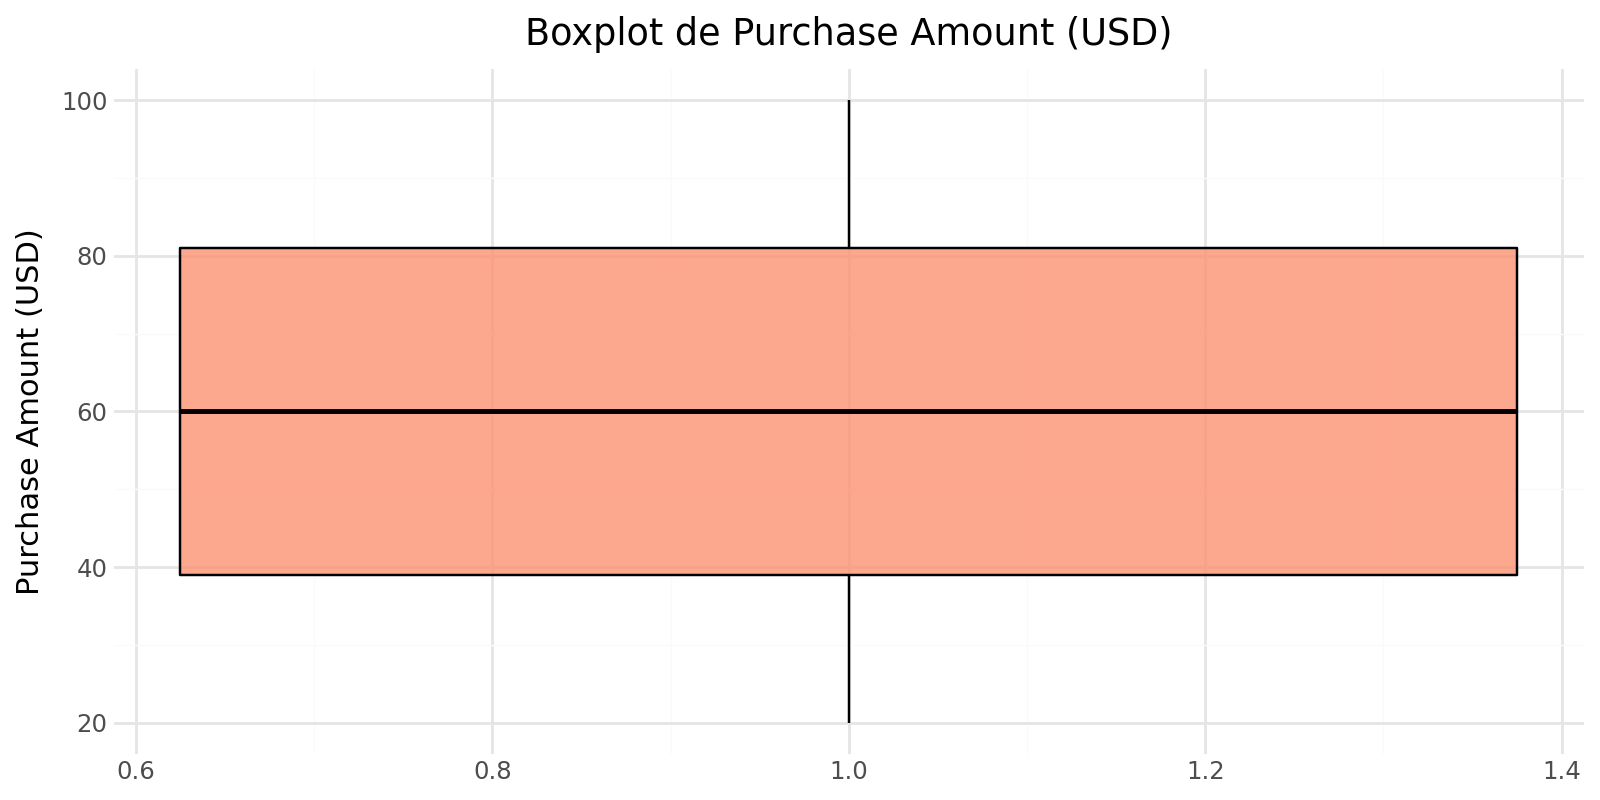

Analisando variável: Review Rating



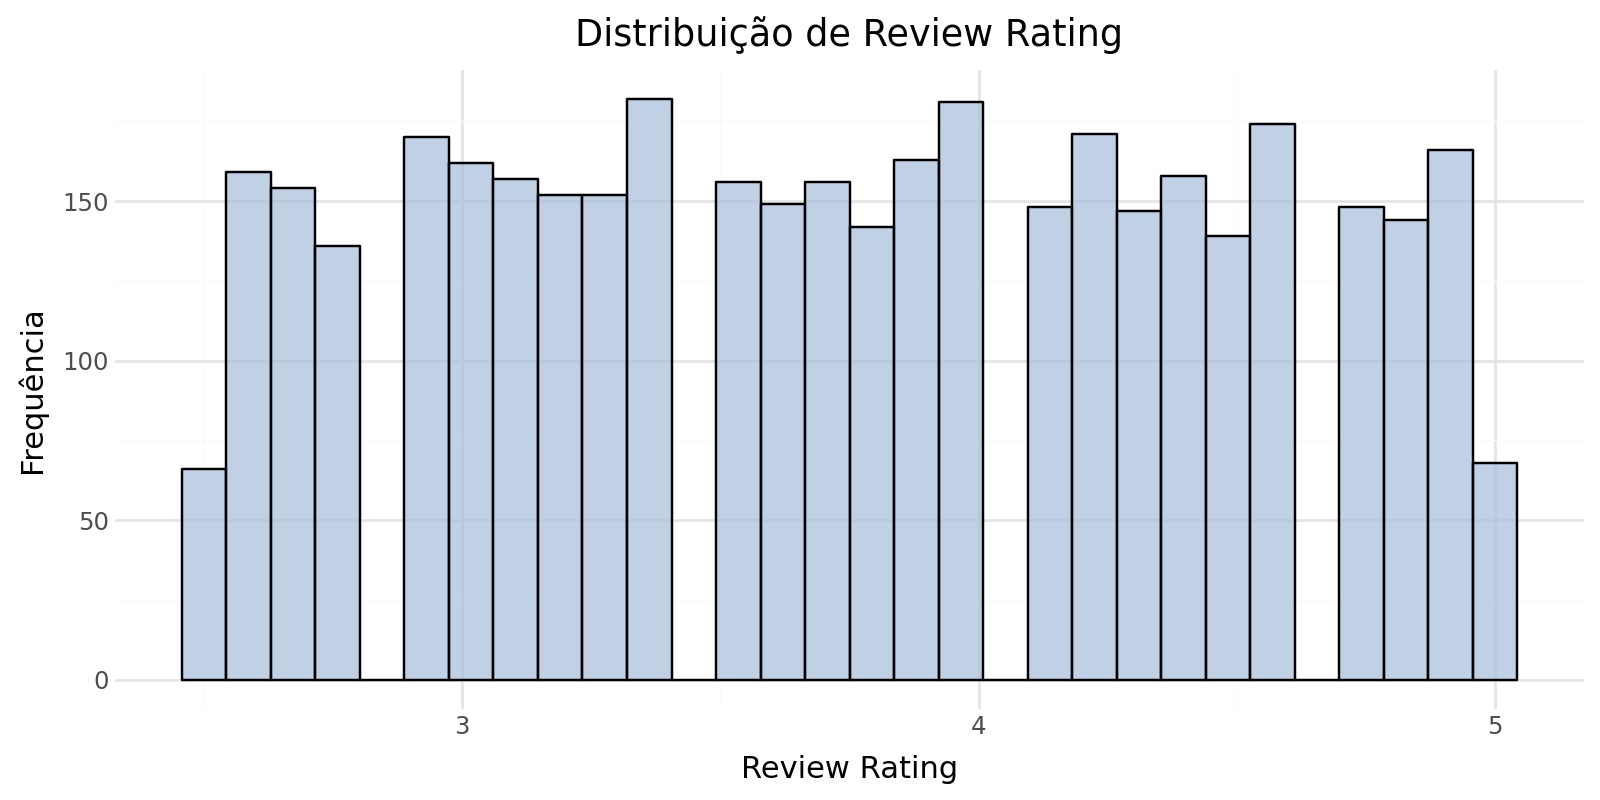

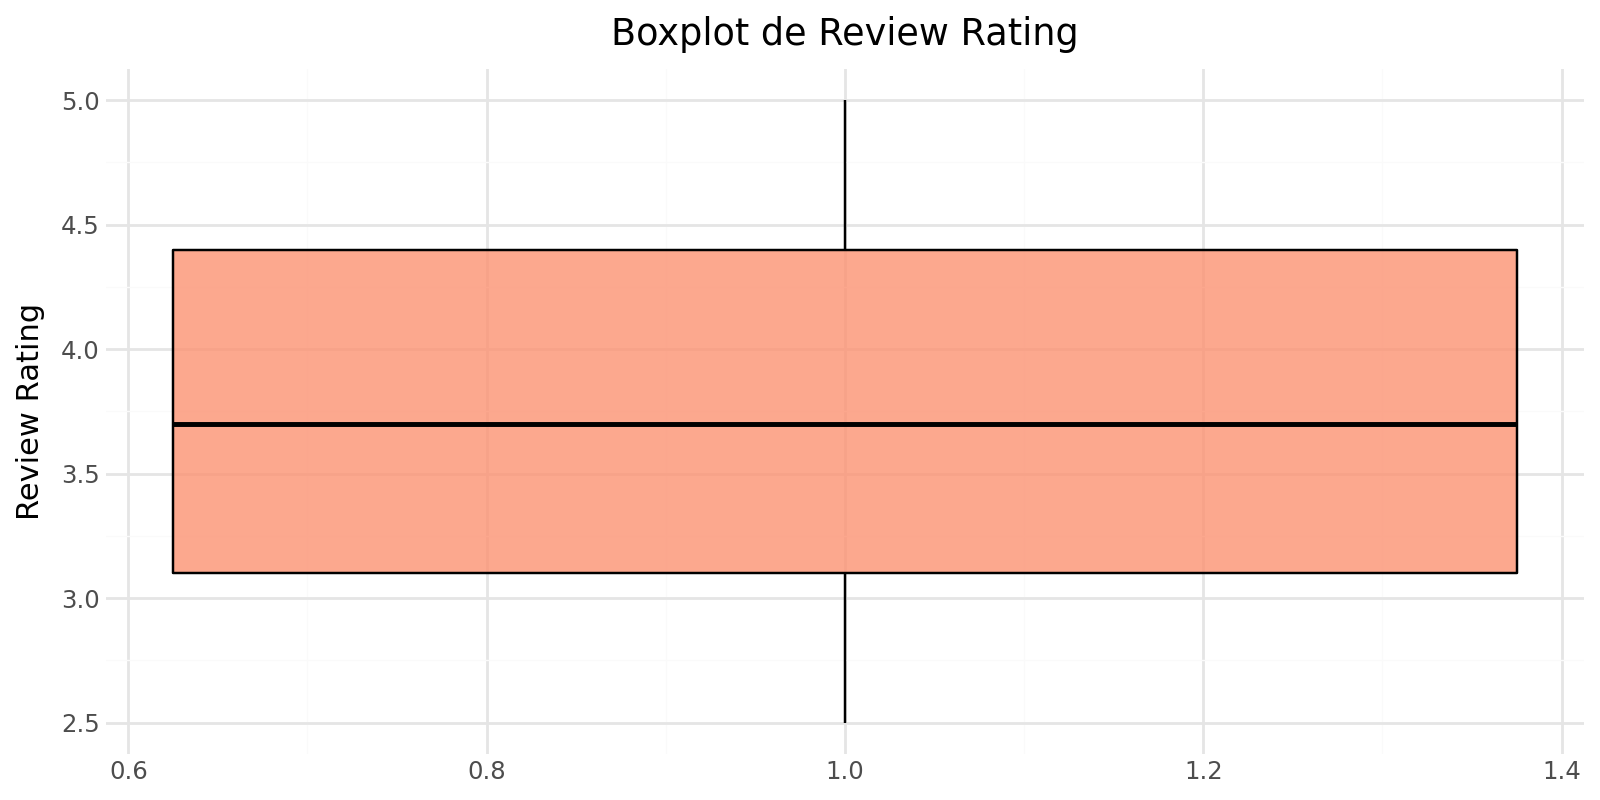

Analisando variável: Previous Purchases



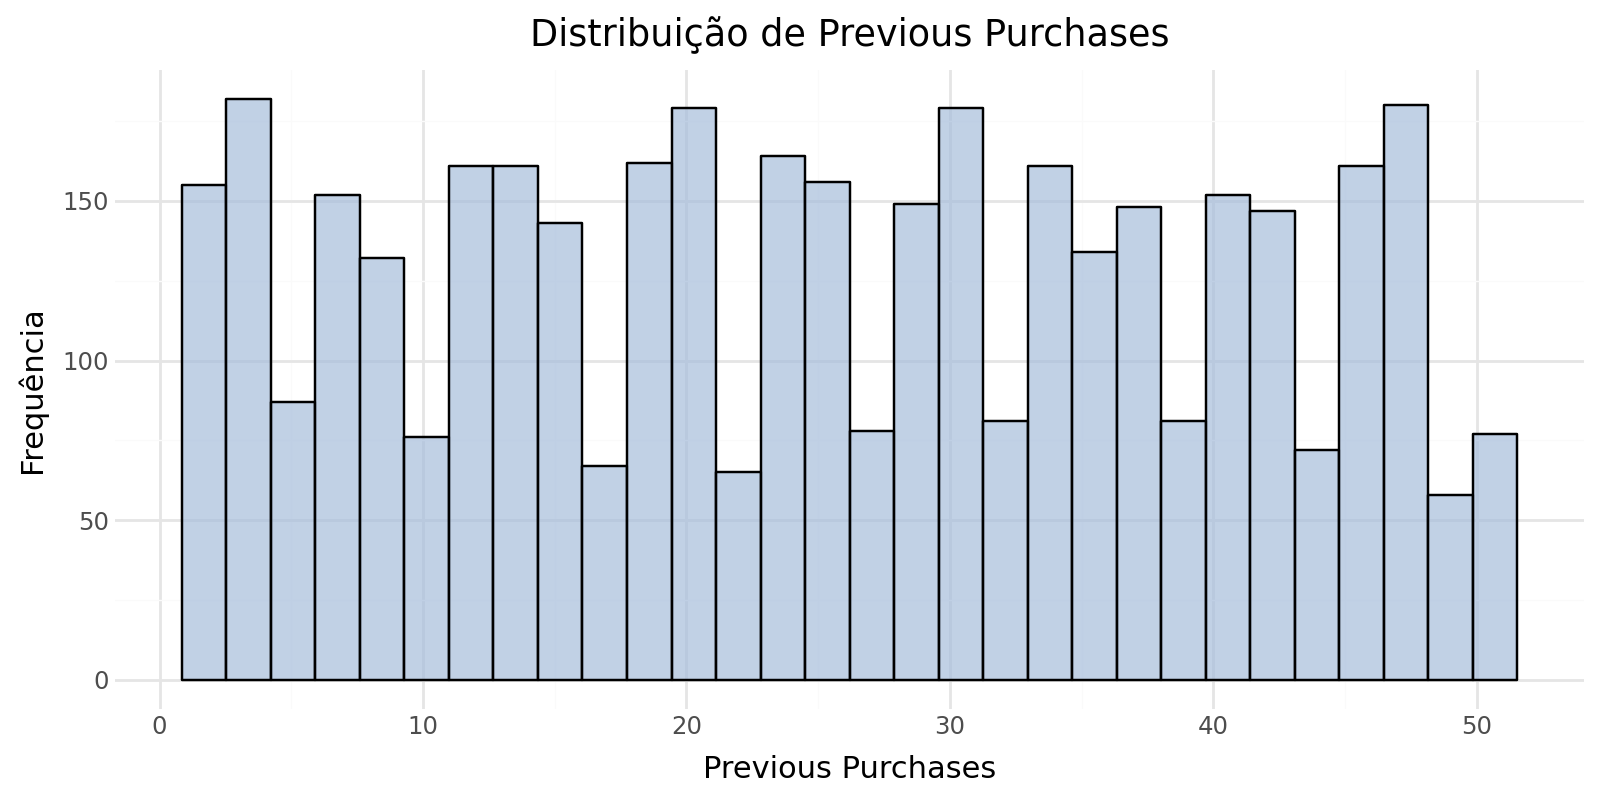

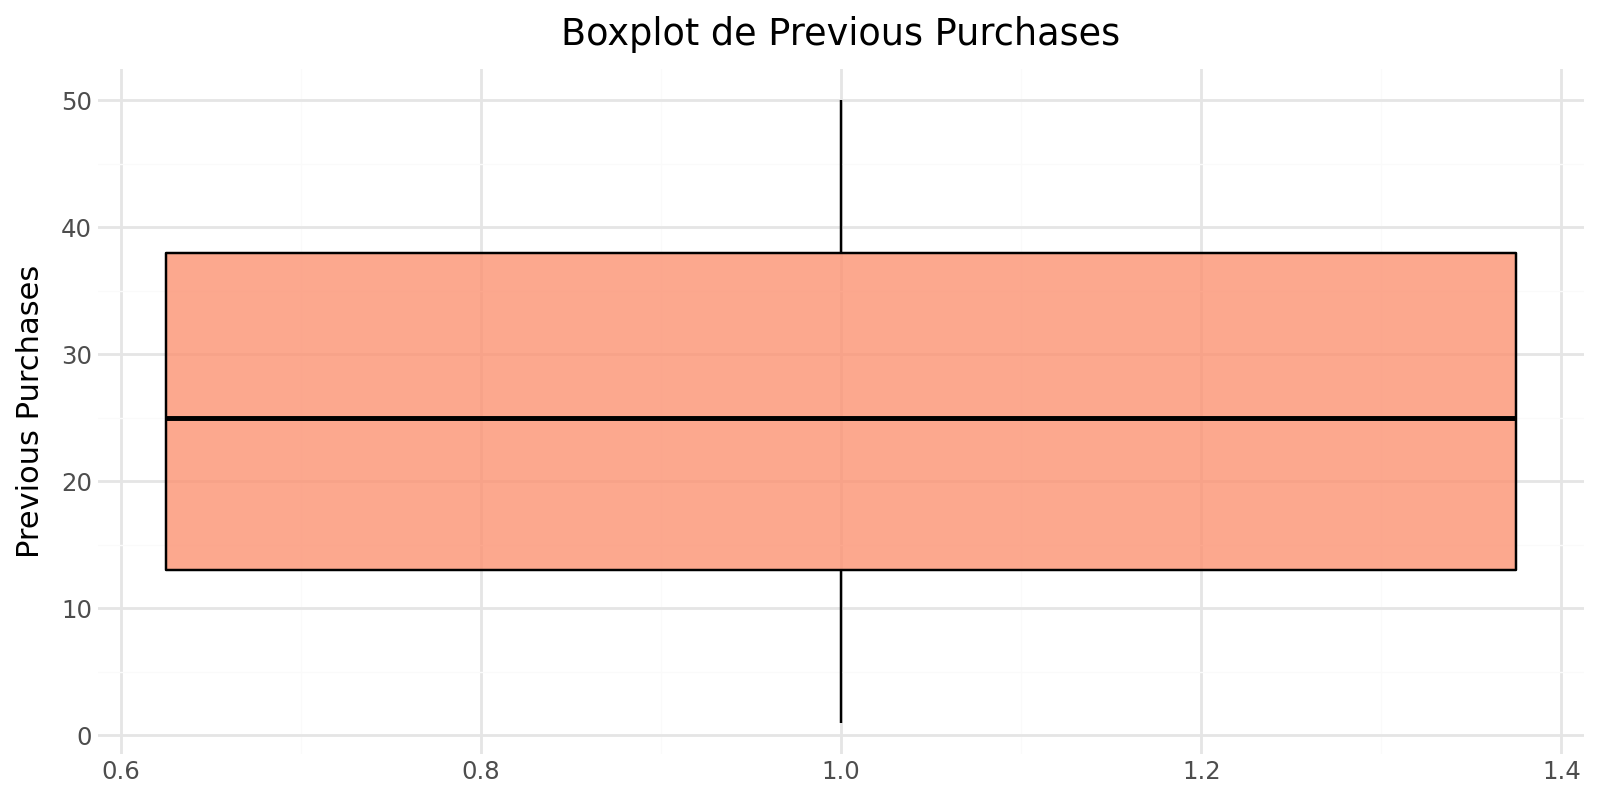

In [34]:
numerical_cols = [col for col in df.select_dtypes(include=['number']).columns if 'customer' not in col.lower()]

for col in numerical_cols:
    print(f"Analisando variável: {col}\n")

    hist = (
        ggplot(df, aes(x=col))
        + geom_histogram(bins=30, fill="#a6bddb", color="black", alpha=0.7)
        + theme_minimal()
        + labs(title=f"Distribuição de {col}", x=col, y="Frequência")
    )

    box = (
        ggplot(df, aes(x=1, y=col))
        + geom_boxplot(fill="#fc9272", color="black", alpha=0.8)
        + theme_minimal()
        + labs(title=f"Boxplot de {col}", x="", y=col)
    )

    display(hist)
    display(box)


Com base na análise realizada, é possível observar que os dados apresentam características adequadas para serem utilizados em processos de clusterização. Caso todos os valores estivessem excessivamente concentrados ou demasiadamente dispersos, isso poderia comprometer a performance dos modelos que aplicaremos na etapa de agrupamento. Dessa forma, é viável prosseguir com o procedimento de clusterização para investigar posteriormente o comportamento de cada cluster e entender os fatores que contribuem para essas diferenças.

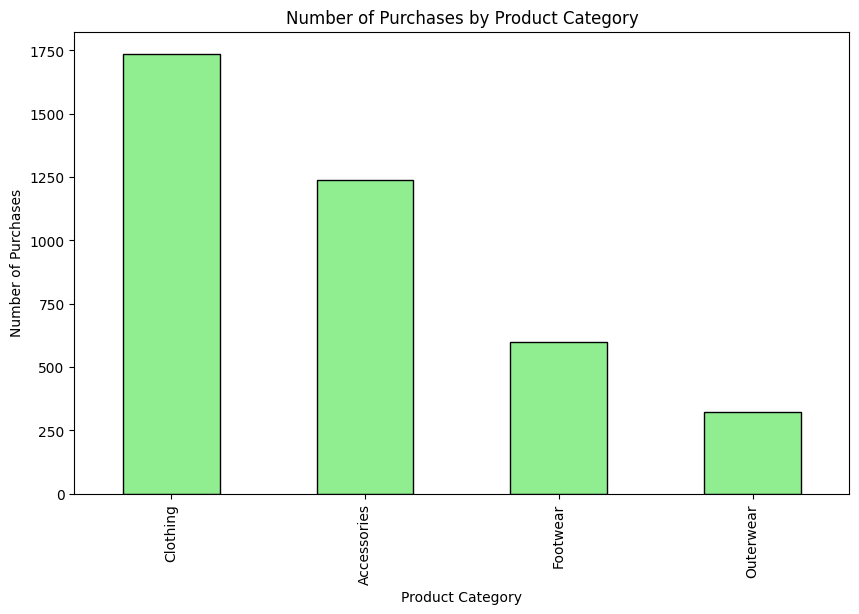

In [35]:
# Frequência de compras por categoria, gênero, estação etc.
category_counts = df['Category'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.plot.bar(color='lightgreen', edgecolor='black')
plt.title('Number of Purchases by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.show()


<a id="prep"></a>

## 3) Limpeza e Pré-processamento

- **Numéricas**: padronização com `StandardScaler`  
- **Categóricas**: one-hot encoding (`OneHotEncoder(handle_unknown="ignore")`)

> Esta etapa evita que a escala de variáveis distorça as distâncias no K-Means e nas projeções.


In [36]:
# Tratamento de valores ausentes
missing_summary = df.isnull().sum()
print("Missing Values Summary:")
print(missing_summary[missing_summary > 0])


Missing Values Summary:
Series([], dtype: int64)


In [37]:
# Codificação categórica (OneHotEncoder)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
categorical_data = ohe.fit_transform(df[categorical_cols])

In [38]:
# Escalonamento (StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_data = scaler.fit_transform(df[numerical_cols])


In [39]:
df_final = pd.concat(
    [pd.DataFrame(numerical_data, columns=numerical_cols),
        pd.DataFrame(categorical_data, columns=ohe.get_feature_names_out(categorical_cols))],
    axis=1
)
df_final = pd.DataFrame(df_final)
df_final.head()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Gender_Male,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,Item Purchased_Dress,...,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.718913,-0.285629,-0.907584,-0.785831,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-1.648629,0.178852,-0.907584,-1.616552,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.390088,0.558882,-0.907584,-0.162789,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.517099,1.276716,-0.349027,1.637107,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.061263,-0.454531,-1.466141,0.391025,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelagem (K-Means, MDS, t-SNE)

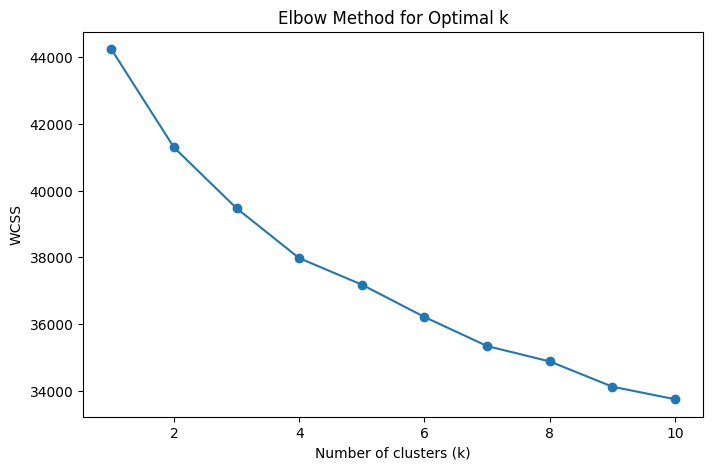

In [40]:
# Determinação de k ótimo usando o método do cotovelo
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


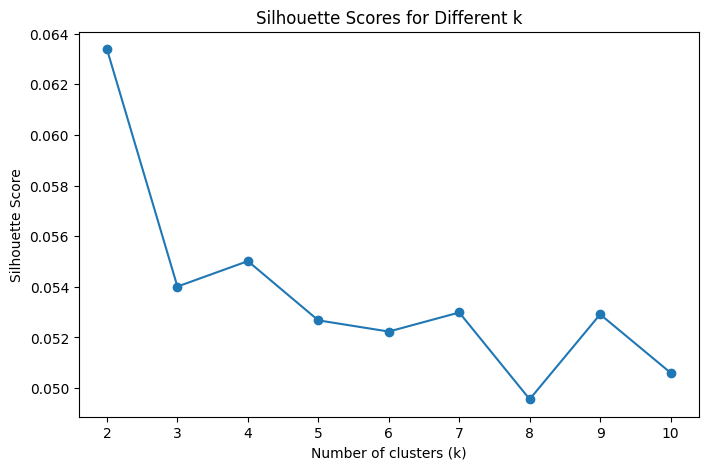

In [41]:
# metodo da silhueta
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_final)
    silhouette_avg = silhouette_score(df_final, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Clusterização com MDS
from sklearn.cluster import KMeans

n_cluster = 4
mds = MDS(n_components=2, random_state=42)

# Aplique o K-means aos dados normalizados
kmeans = KMeans(n_clusters=n_cluster, random_state=42)

X = df_final


# fit_transform
X_mds = mds.fit_transform(X)

# fit
kmeans.fit(X_mds)

# predict
y_pred = kmeans.predict(X_mds)

# plotar o gráfico
plt.figure(figsize=(10,10))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_pred)
plt.title('Kmeans com MDS')
plt.show()


c:\Users\hudso\Desktop\aps-ecommerce-clustering\env\lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.


KeyboardInterrupt: 

# Interpretação dos Clusters (Personas)

In [ ]:
# Perfil médio dos grupos
df['Cluster'] = y_pred
df.groupby('Cluster')[numerical_cols].mean()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Cluster,,,,,
0,1919.389061,54.377709,69.222910,3.828173,12.776058
1,1667.163324,29.547278,46.408787,3.778415,22.509074
2,2014.975610,55.638581,41.702882,3.734146,34.526608
3,2224.067210,38.750509,81.260692,3.656925,32.363544


# Conclusões e Recomendações

In [ ]:
# A desenvolver